<a href="https://colab.research.google.com/github/AnnayanB/SupervisedML_BankMarketingCampaigns/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report, roc_curve

In [ ]:
url = 'https://raw.githubusercontent.com/AnnayanB/SupervisedML_BankMarketingCampaigns/main/bank-full.csv'

In [ ]:
df = pd.read_csv(url,sep=';',engine='python')

**Brief look at the dataset.**

In [ ]:
df.shape

(45211, 17)

In [ ]:
df.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


**Checking the columns present in our dataset.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Checking the stats of the columns**

In [ ]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [ ]:
#Checking any duplicate rows.
len(df[df.duplicated()])

0

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

**Checking if we have null in our dataset**


In [ ]:
df.isnull().sum().sum()

0

**Checking unique values in each columns**

In [ ]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [ ]:
# Defining the categorical columns
cat_col = [col for col in df.describe(include='all') if col not in ['age','balance','day','duration','campaign','pdays','previous']]

In [ ]:
cat_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [ ]:
# Checking unique values for each categorical column.
for col in cat_col:
  print(" ")
  print(f'unique value of {col} are {df[col].unique()}')
  print(" ")
  print(f'number of unique {col} are {df[col].nunique()}')
  print(" ")
  print(df[col].value_counts())

 
unique value of job are ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
 
number of unique job are 12
 
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
 
unique value of marital are ['married' 'single' 'divorced']
 
number of unique marital are 3
 
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
 
unique value of education are ['tertiary' 'secondary' 'unknown' 'primary']
 
number of unique education are 4
 
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
 
unique value of default are ['no' 'yes']
 
number of unique default are 2
 
no     44396
yes      815
N

# **Exploratory Data Analysis**

**Categorical Columns**

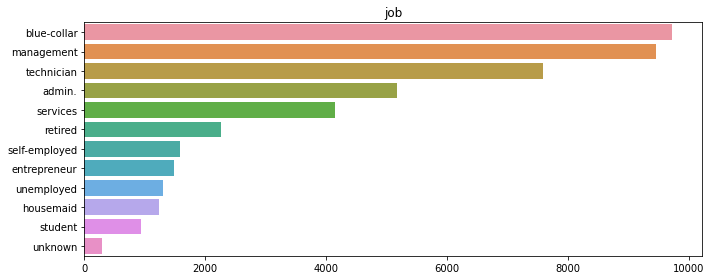

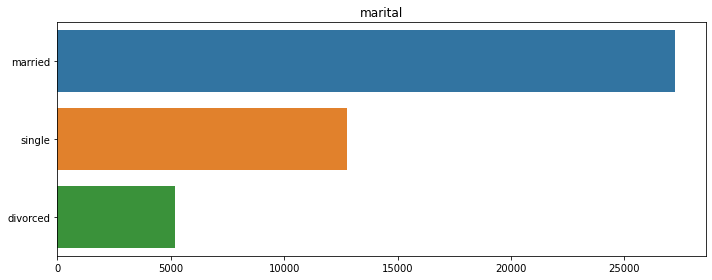

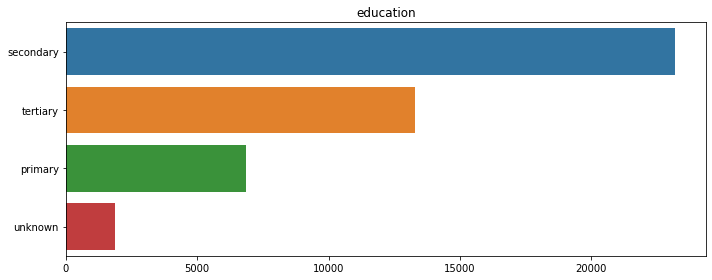

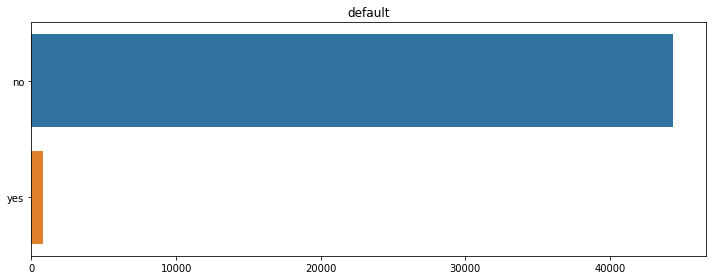

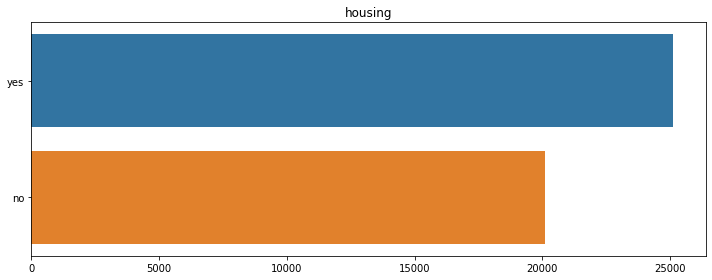

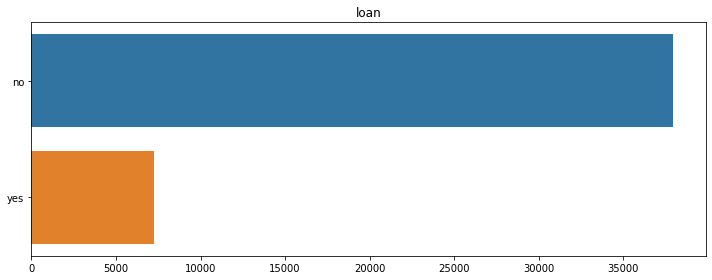

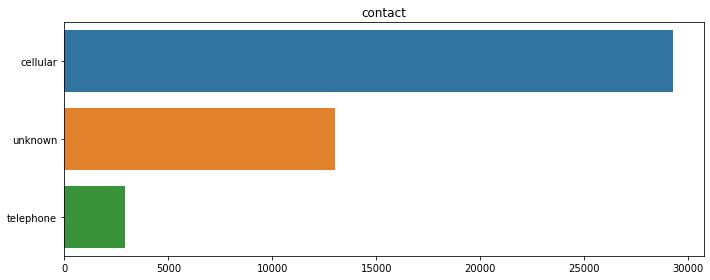

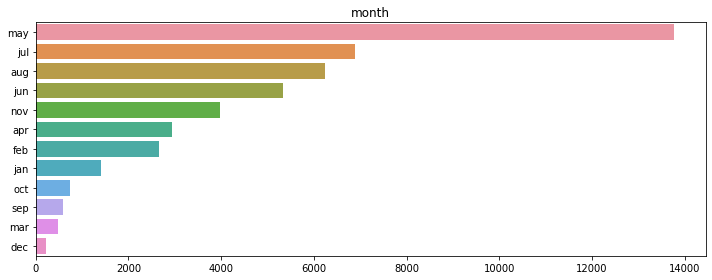

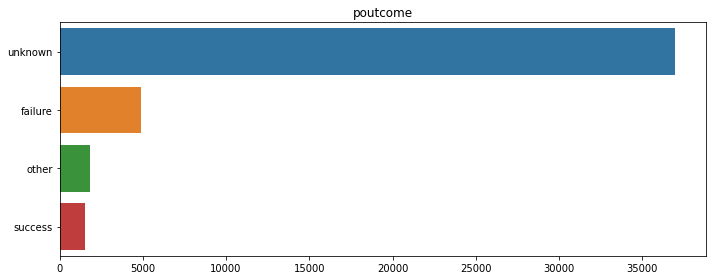

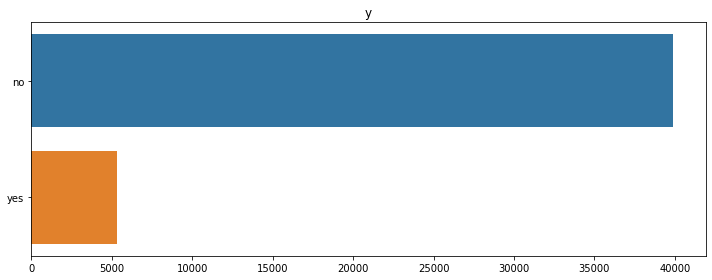

In [ ]:
for col in cat_col:
  plt.figure(figsize=(10,4))
  sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
  plt.title(col)
  plt.tight_layout()

**Observations:**

1) Top 3 jobs in our dataset are - blue collar, management and technician.

2) Most of the people contacted are married.

3) Most of the people are having secondary level qualification.

4) Very few people have credit in default.

5) People having housing loan is far greater than people having personal loan.

6) Most of the people were contact via cellular mode.

7) We have very less number of people who actually took term deposit - an example of class imbalance.

# **Categorical Column and the Target Variable**

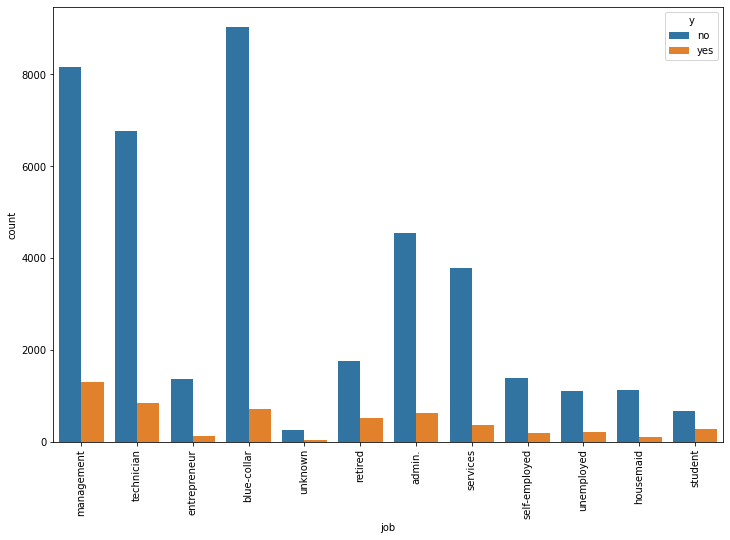

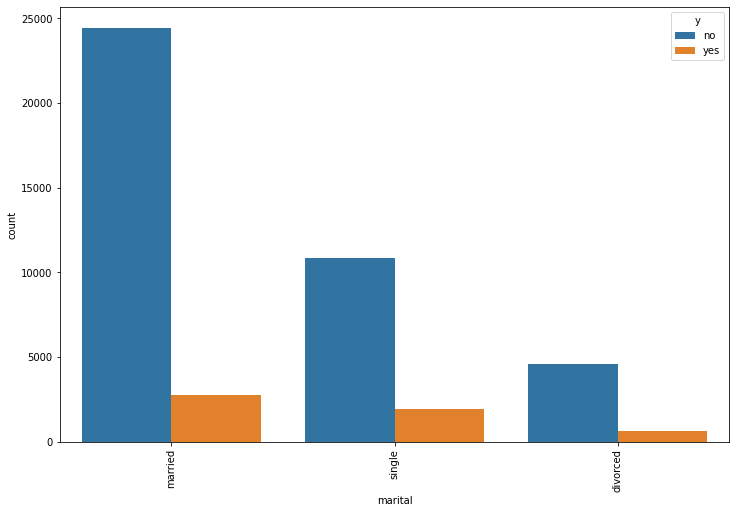

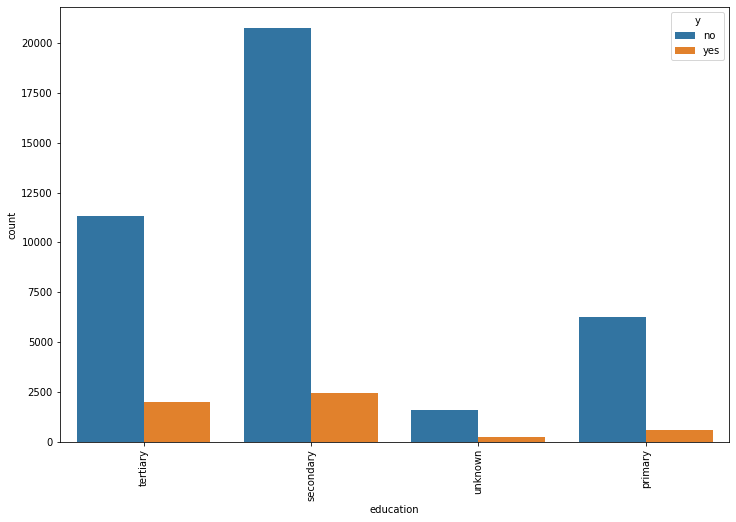

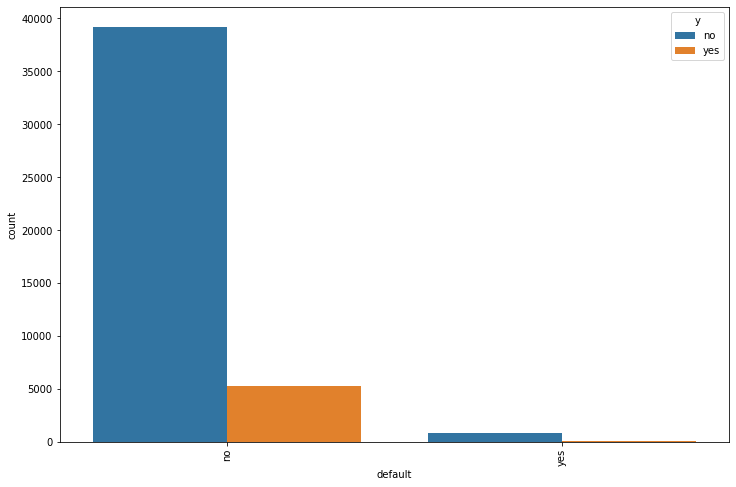

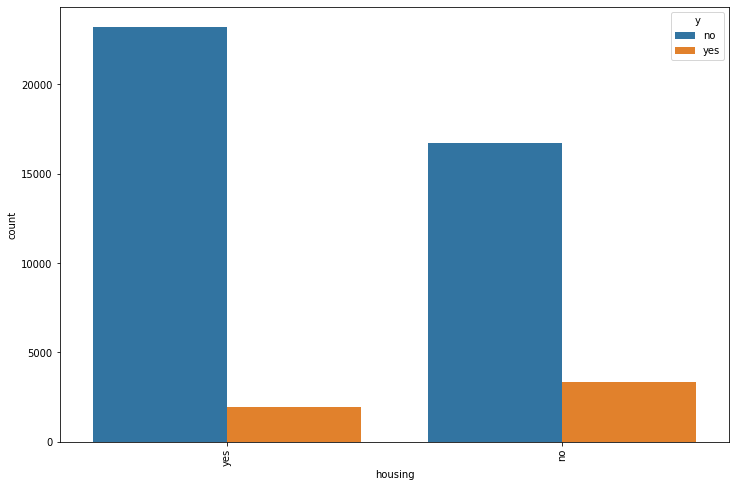

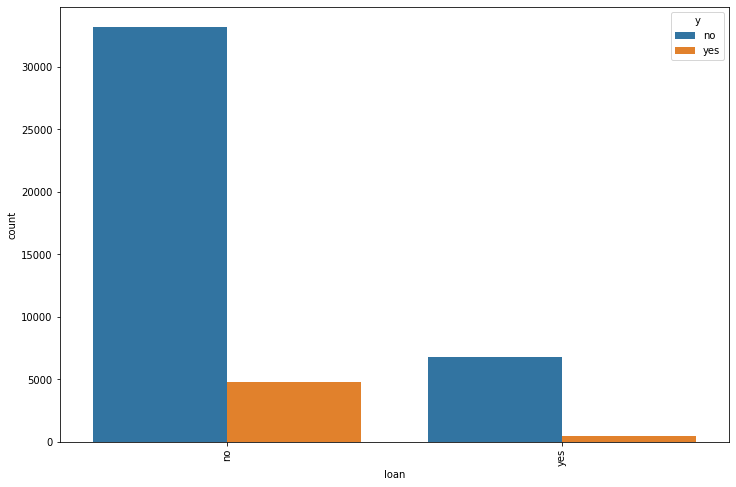

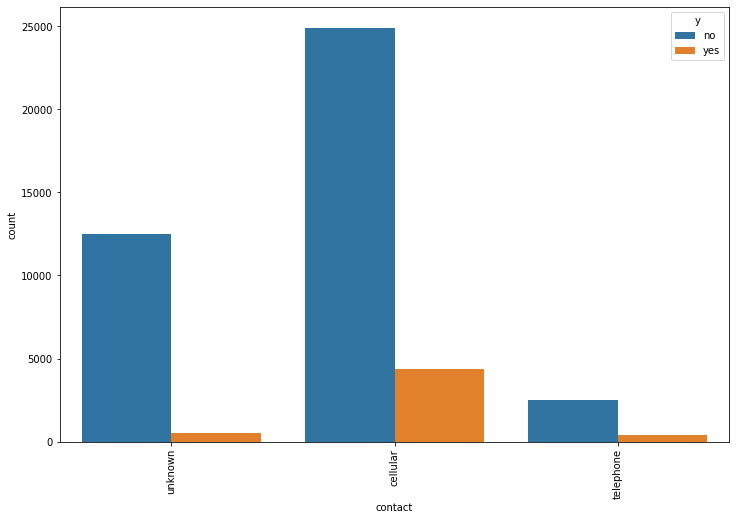

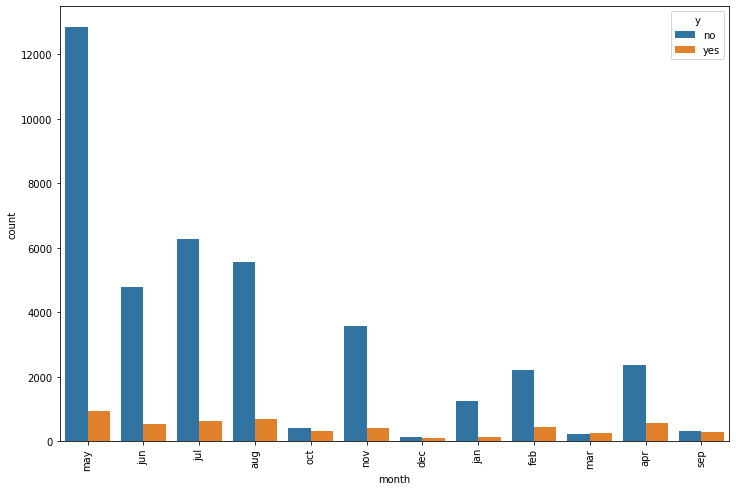

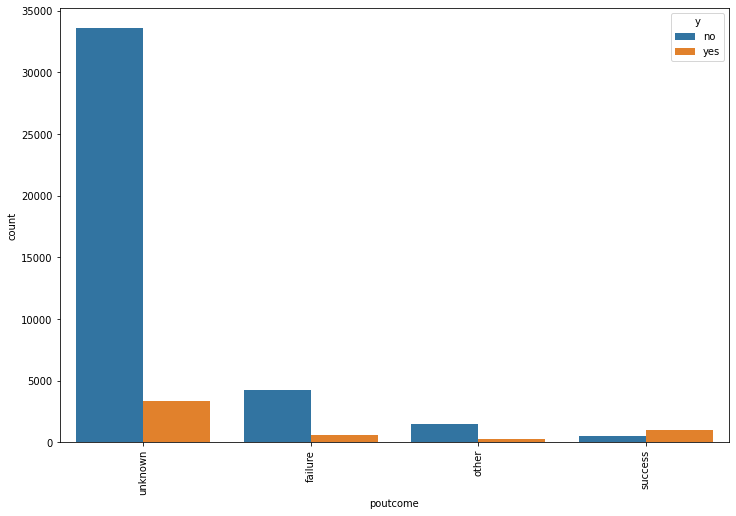

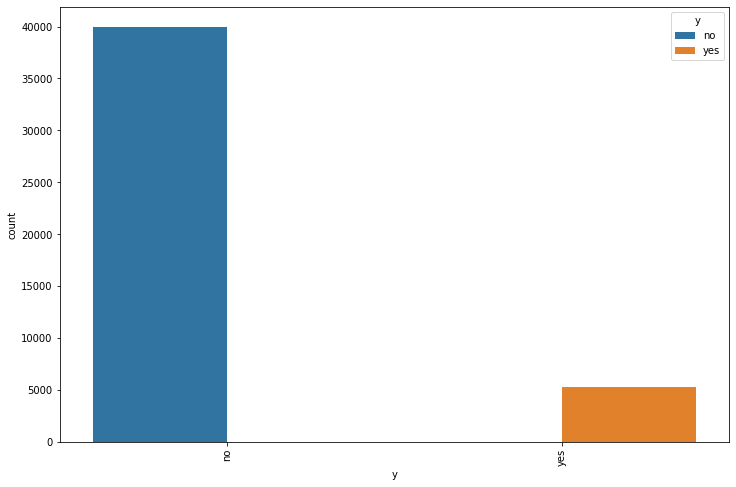

In [ ]:
for col in cat_col:
   fig = plt.figure(figsize=(12, 8))
   sns.countplot(x=df[col], hue=df["y"])
   plt.xticks(rotation=90)

#**Pie charts for better visualization**

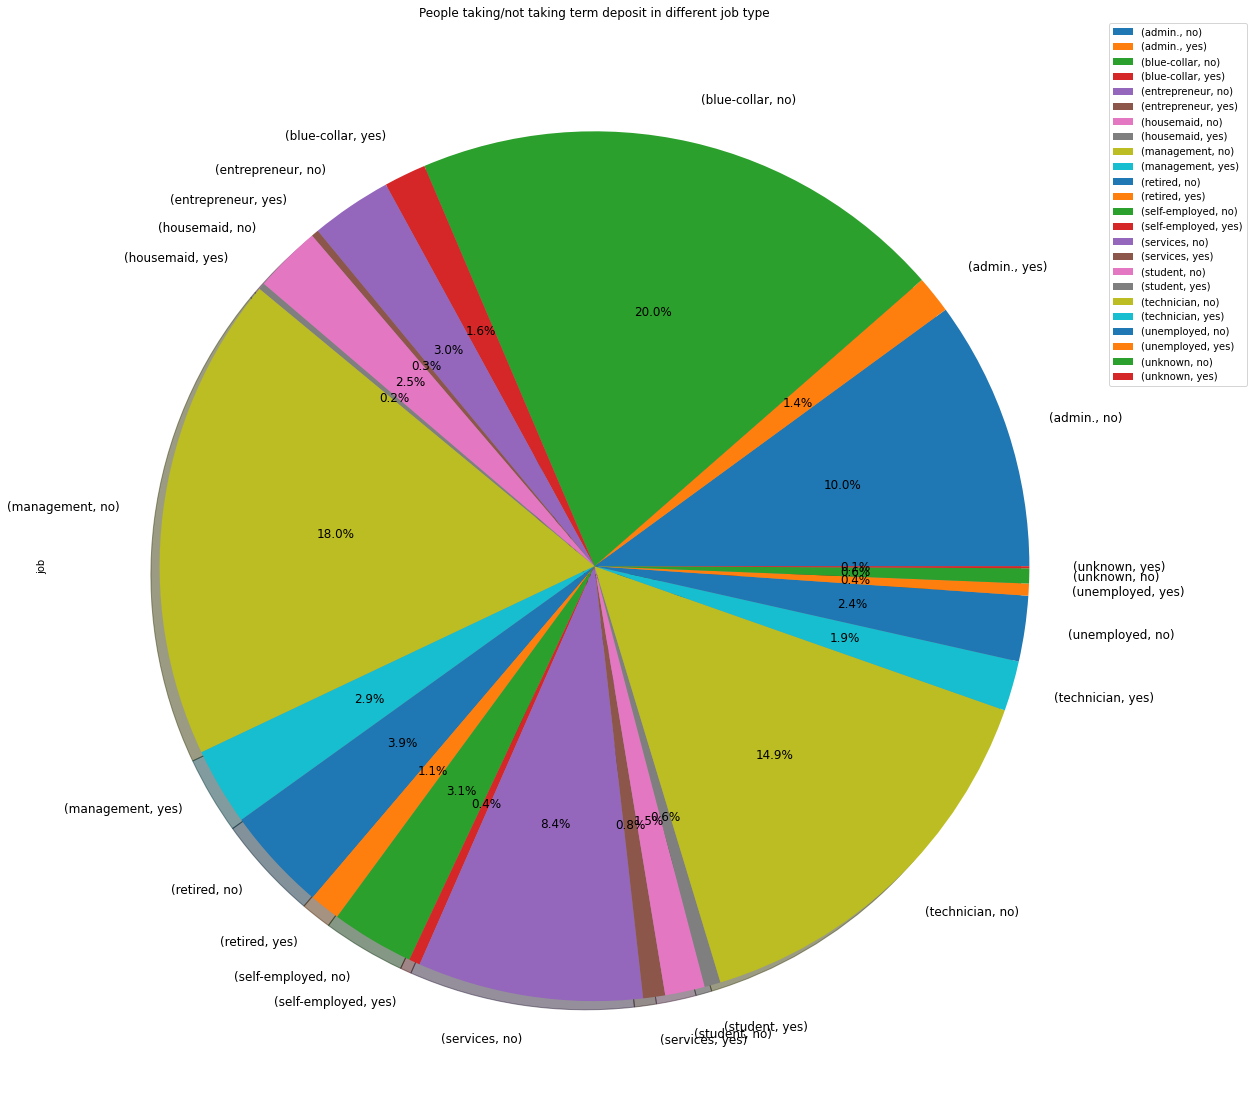

In [ ]:
fig = plt.figure(figsize=(20, 20))
df.groupby(["job","y"])["job"].count().plot.pie(title="People taking/not taking term deposit in different job type", autopct='%1.1f%%', shadow='false', fontsize=12)
plt.legend(bbox_to_anchor=(1.1,1),loc='upper right',borderaxespad=0)

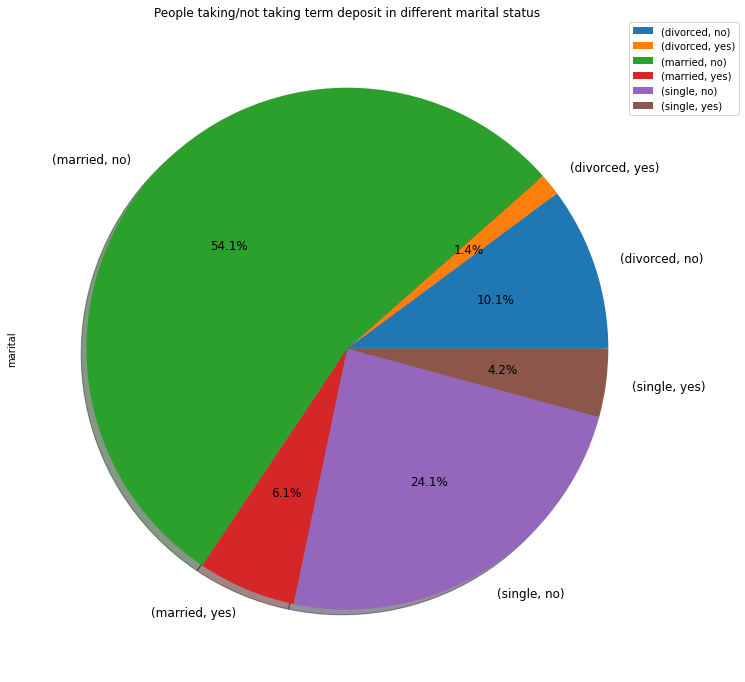

In [ ]:
fig = plt.figure(figsize=(15, 12))
df.groupby(["marital","y"])["marital"].count().plot.pie(title="People taking/not taking term deposit in different marital status", autopct='%1.1f%%', shadow='false', fontsize=12,legend='true')
plt.legend(bbox_to_anchor=(1.1,1),loc='upper right',borderaxespad=0)

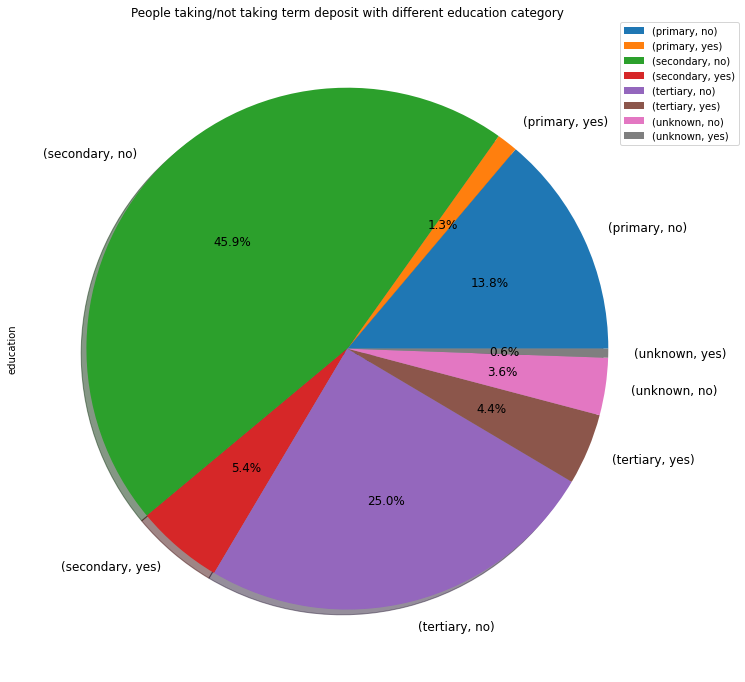

In [ ]:
fig = plt.figure(figsize=(15, 12))
df.groupby(["education","y"])["education"].count().plot.pie(title="People taking/not taking term deposit with different education category", autopct='%1.1f%%', shadow='false', fontsize=12,legend='true')
plt.legend(bbox_to_anchor=(1.1,1),loc='upper right',borderaxespad=0)

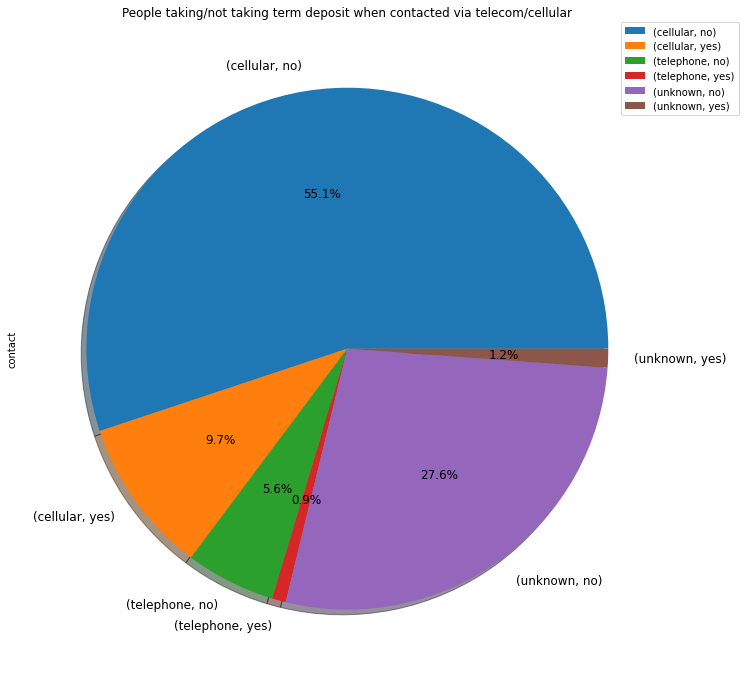

In [ ]:
fig = plt.figure(figsize=(15, 12))
df.groupby(["contact","y"])["contact"].count().plot.pie(title="People taking/not taking term deposit when contacted via telecom/cellular", autopct='%1.1f%%', shadow='false', fontsize=12, legend='true')
plt.legend(bbox_to_anchor=(1.1,1),loc='upper right',borderaxespad=0)

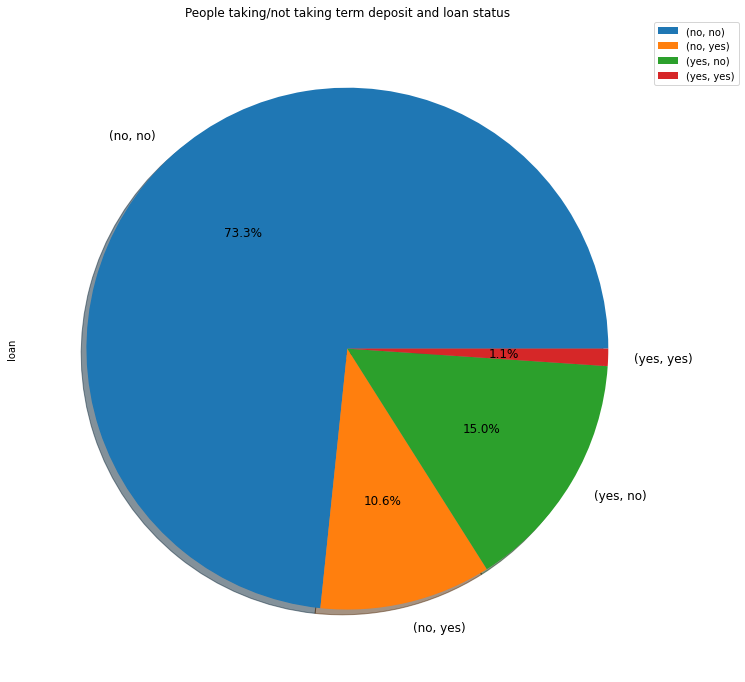

In [ ]:
fig = plt.figure(figsize=(15, 12))
df.groupby(["loan","y"])["loan"].count().plot.pie(title="People taking/not taking term deposit and loan status", autopct='%1.1f%%', shadow='false', fontsize=12, legend='true')
plt.legend(bbox_to_anchor=(1.1,1),loc='upper right',borderaxespad=0)

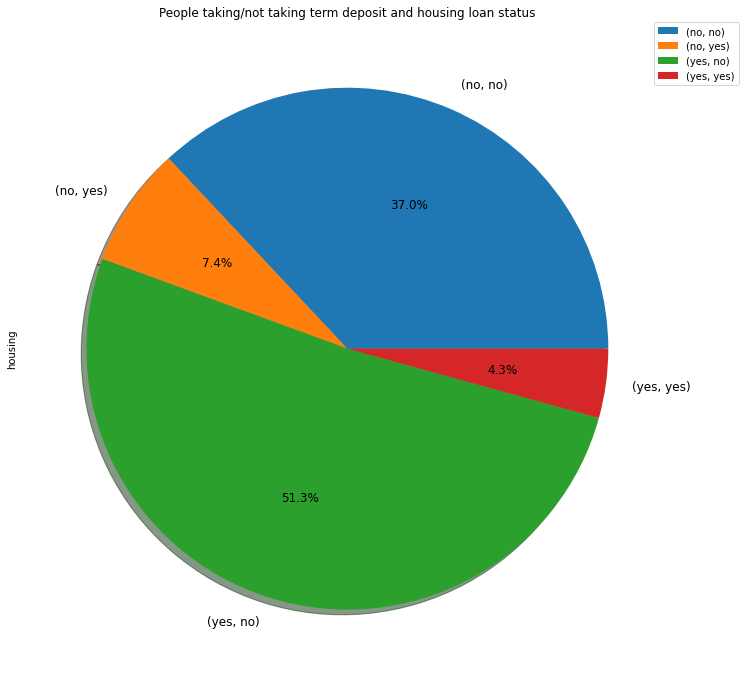

In [ ]:
fig = plt.figure(figsize=(15, 12))
df.groupby(["housing","y"])["housing"].count().plot.pie(title="People taking/not taking term deposit and housing loan status", autopct='%1.1f%%', shadow='false', fontsize=12, legend='true')
plt.legend(bbox_to_anchor=(1.1,1),loc='upper right',borderaxespad=0)

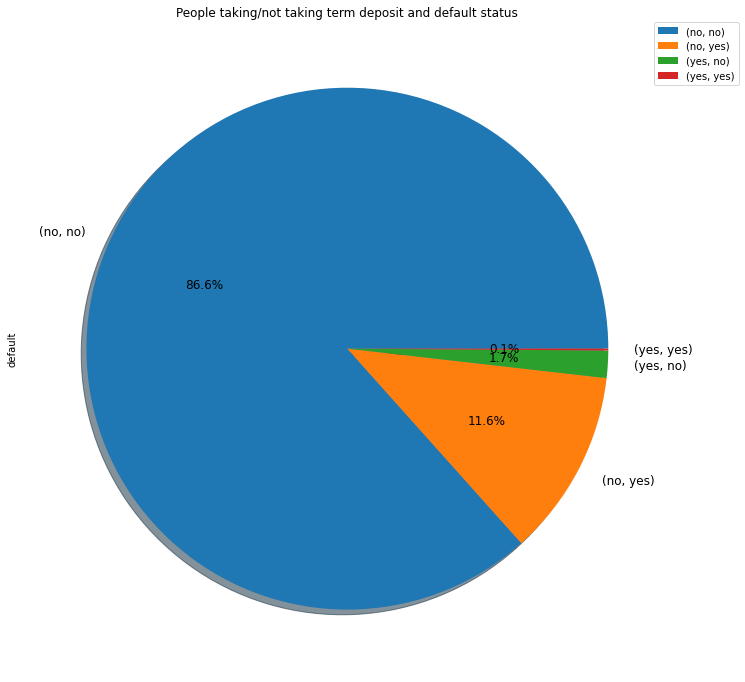

In [ ]:
fig = plt.figure(figsize=(15, 12))
df.groupby(["default","y"])["default"].count().plot.pie(title="People taking/not taking term deposit and default status", autopct='%1.1f%%', shadow='false', fontsize=12, legend='true')
plt.legend(bbox_to_anchor=(1.1,1),loc='upper right',borderaxespad=0)

**Observations -**

1) **Although we have more people employed in blue collar jobs in our dataset but the people employed in management jobs tends to take more term deposit. As expected, Housemaids are least interested in taking any term deposit.**

2) **Married people tend to take term deposit slightly more than the singles.**

3) **People with secondary education are more interested in taking term deposit than those who have tertiary level of education.**

4) **Majority of the people who took term deposit were contacted via cellular mode.**

5) **As expected people having no personal loan tends to take term deposit.**

6) **As expected people having no housing loan tends to take term deposit.**

7) **Number of People which were having no credit in default took more term deposit much than those who had credit in default.**

8) **As evident we have more such people in our dataset who didn't take term deposit. It is quite imbalance.**

#**Numeric Features**

In [ ]:
numeric_features = df.describe().columns
list(numeric_features)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

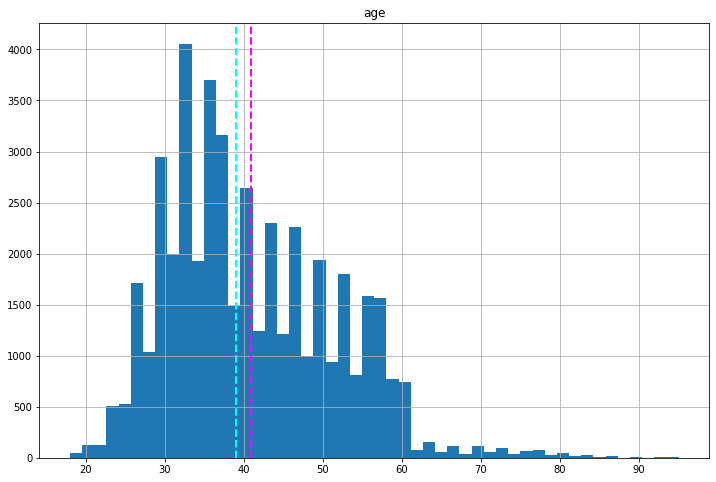

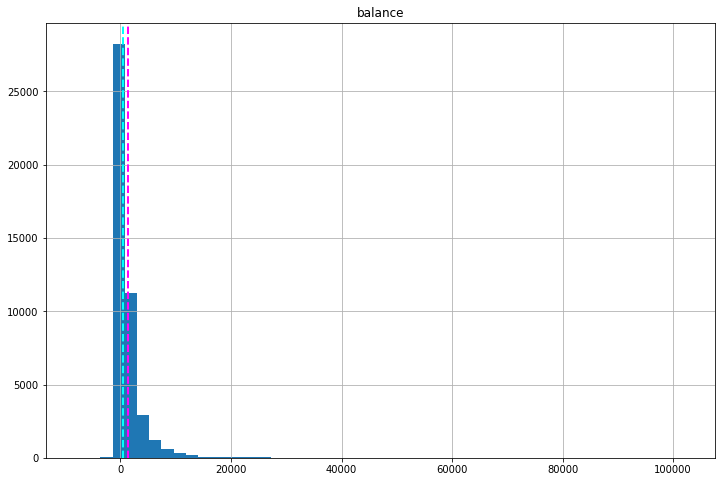

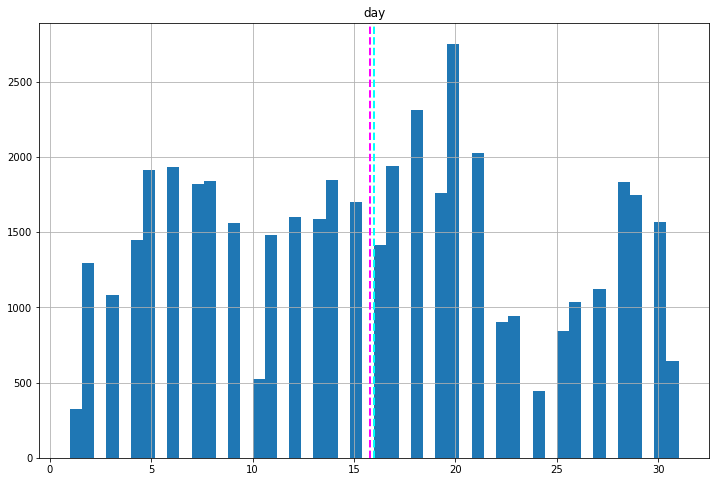

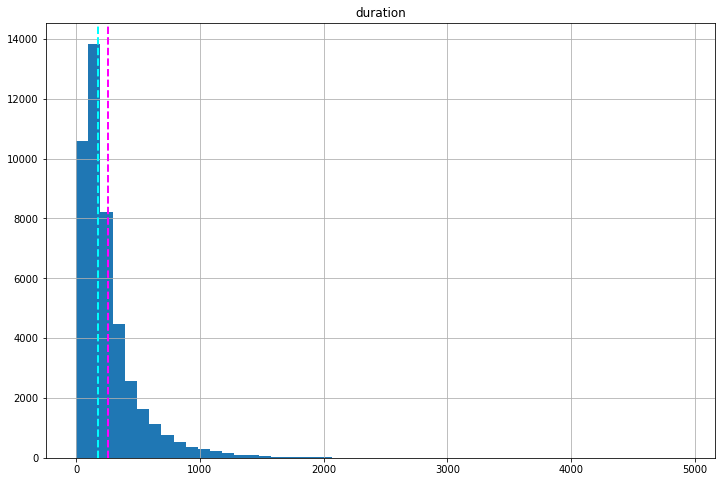

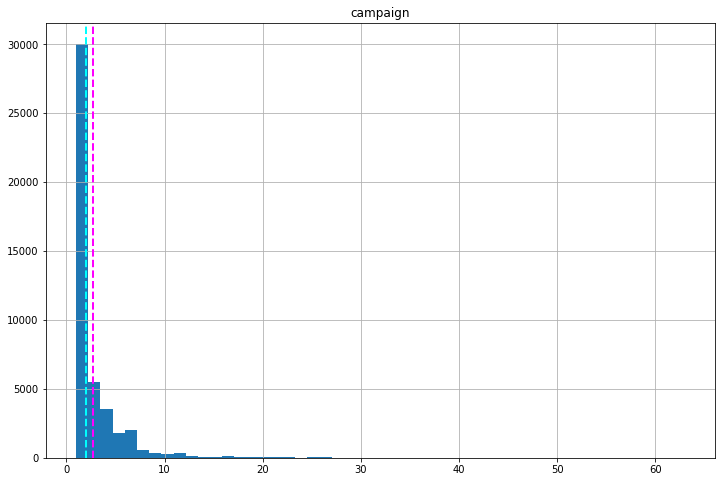

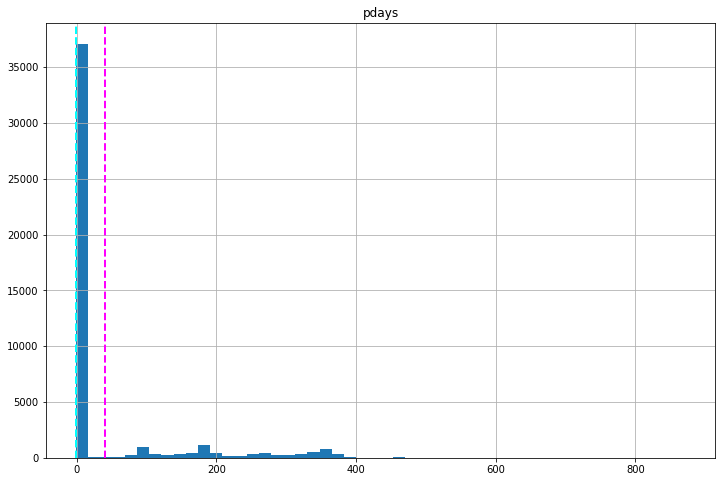

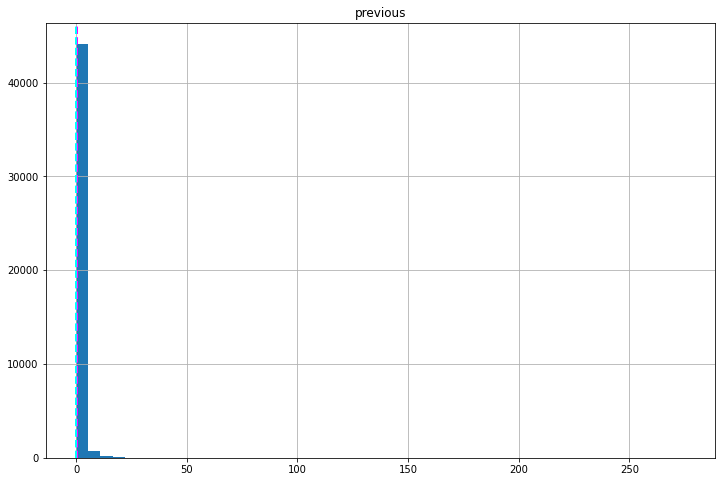

In [ ]:
# plot a bar plot for each numerical feature count (except Store)

for col in numeric_features[0:]:
   
    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

**Observations -**

1) **Majority of people's age who were targeted during the campaign is between 30-50 years.**

2) **Majority of people have balance less than 3000 and very few have balance greater than 5000.**

3) **Majority of people were contacted less than 5 times during the campaign.**

In [ ]:
df[df['pdays']==-1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


**pdays are the number of days that passed by after the client was last contacted from a previous campaign. As we can see from the above dataframe that we have around 37k records which have pdays as -1. This value means that either these clients were not contacted or these are missing values. So we will drop these columns.**

In [ ]:
df.drop('pdays',axis=1,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


**Also, We will drop the 'duration' variable as the value of the variable will only be known at the end of the call. Hence, at that time we will also know the outcome of the call. The 'duration' variable will lead to leakage in the data and the prediction model will not be realistic.**

In [ ]:
df.drop('duration',axis=1,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(5), object(10)
memory usage: 5.2+ MB


#**Outlier Detection**

In [ ]:
numeric_features1 = ['age', 'balance', 'day', 'campaign', 'previous']

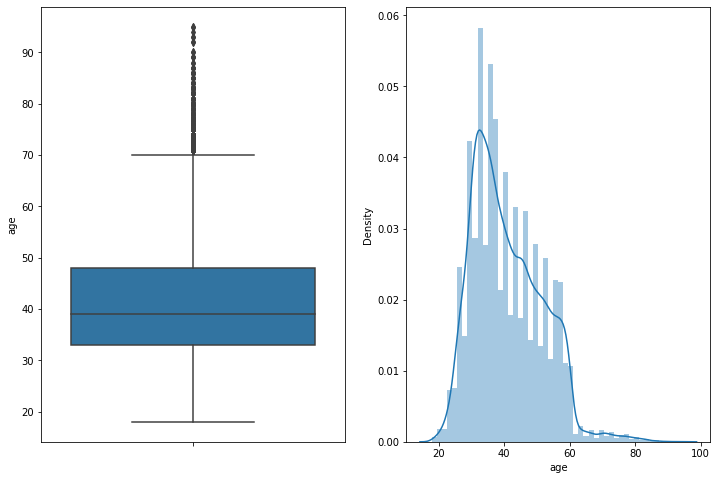

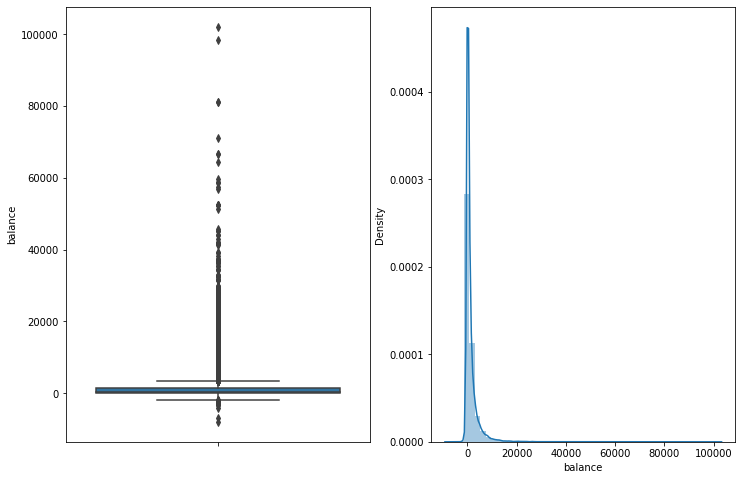

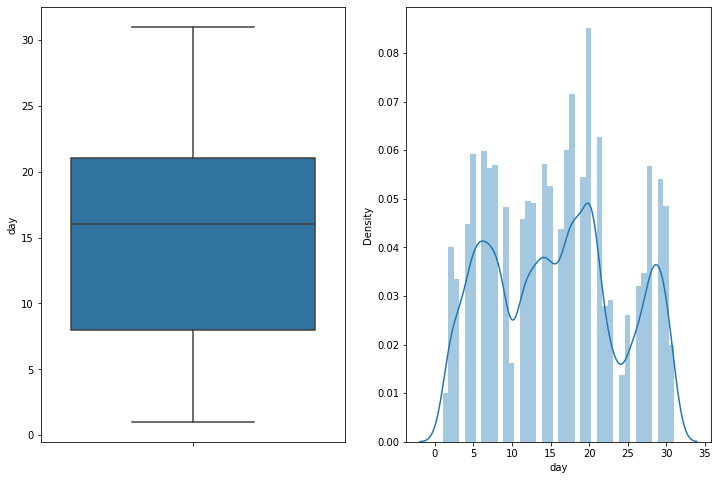

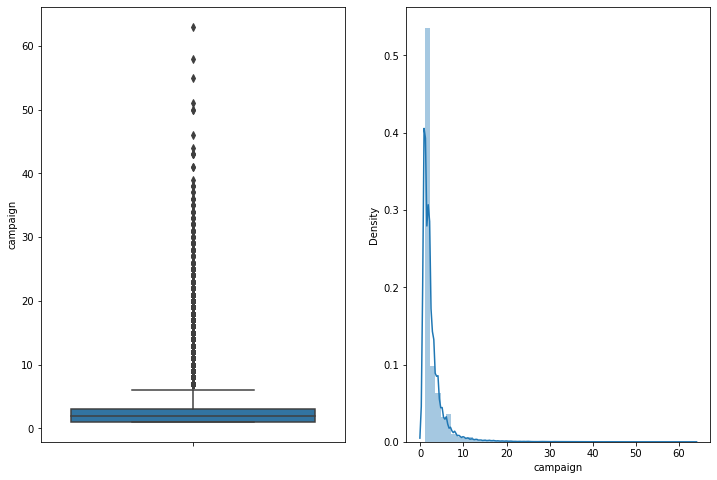

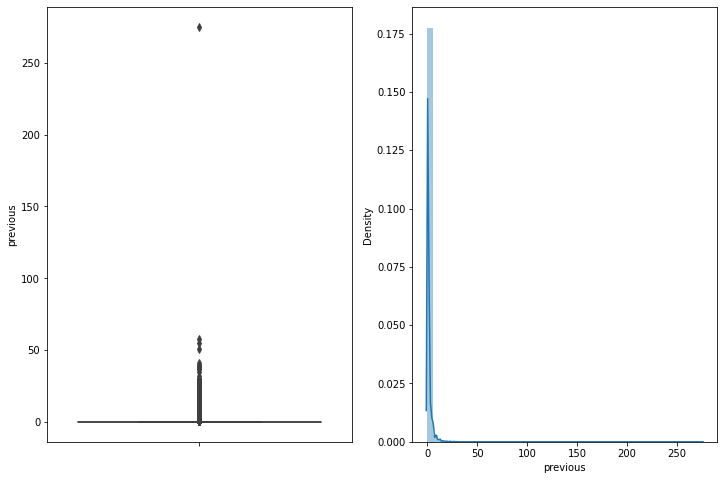

In [ ]:
for var in numeric_features1:
    plt.figure(figsize=(12,8))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna())
    #fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

1) **As we can see that previous and campaign column contains a lot of outliers, so we will be treating the outliers by capping them b/w the quantile range of 5 to 95%**

2) **Age and balance reflects the characterestics of the people who were targeted during the campaign so we won't be treating them.**

In [ ]:
upper_lim_campaign = df['campaign'].quantile(.95)
lower_lim_campaign = df['campaign'].quantile(.05)
df.loc[(df["campaign"] > upper_lim_campaign),"campaign"] = upper_lim_campaign
df.loc[(df["campaign"] < lower_lim_campaign),"campaign"] = lower_lim_campaign

In [ ]:
upper_lim_previous = df['previous'].quantile(.95)
lower_lim_previous = df['previous'].quantile(.05)
df.loc[(df["previous"] > upper_lim_previous),"previous"] = upper_lim_previous
df.loc[(df["previous"] < lower_lim_previous),"previous"] = lower_lim_previous

In [ ]:
numeric_features2 = ['campaign', 'previous']

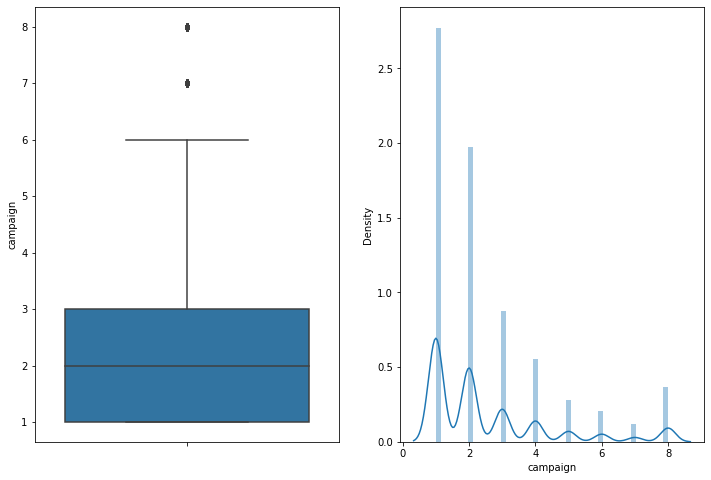

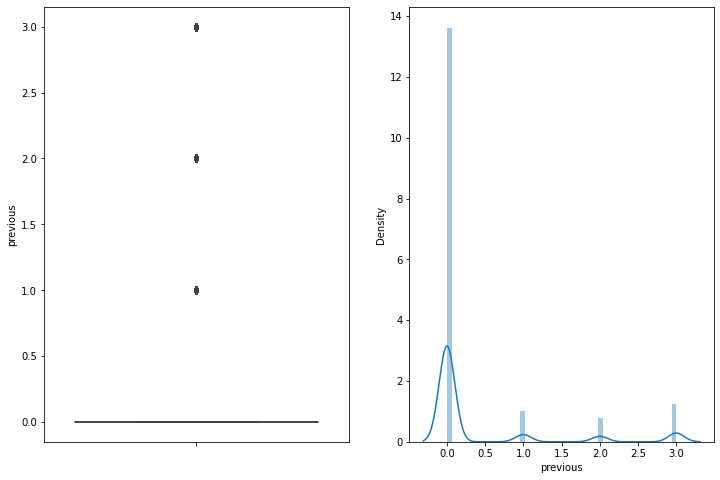

In [ ]:
for var in numeric_features2:
    plt.figure(figsize=(12,8))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna())
    #fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

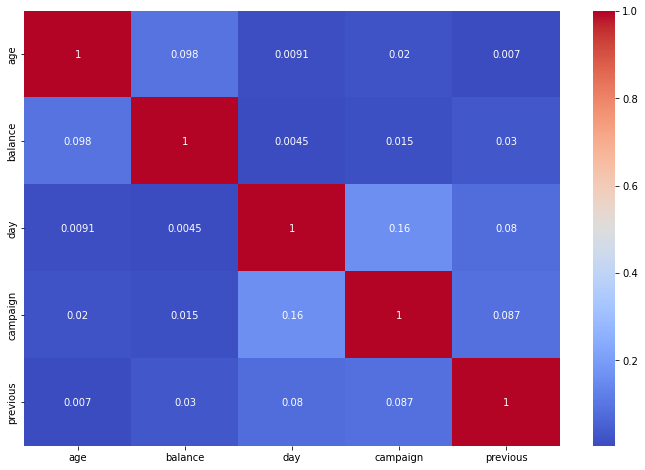

In [ ]:
## Correlation
plt.figure(figsize=(12,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,0,unknown,no


#**Feature Engineering**

**Label Encoding**

In [ ]:
#changing into boolean 
df1['default'].replace({'yes':1,'no':0}, inplace=True)
df1['loan'].replace({'yes':1,'no':0}, inplace=True)
df1['housing'].replace({'yes':1,'no':0}, inplace=True)
df1['y'].replace({'yes':1,'no':0}, inplace=True)

In [ ]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,1,0,unknown,0


In [ ]:
# One hot encoding
df1 = pd.get_dummies(df1, columns=["education", "marital","job","contact","poutcome","month"])

In [ ]:
pd.set_option('display.max_columns',47 )
df1

,age,default,balance,housing,loan,day,campaign,previous,y,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,2,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,5,3,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,4,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df3=df1.copy()

In [ ]:
df2=df1['y']

In [ ]:
df1.drop('y',axis=1,inplace = True)

#**Handling Imbalance**

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df1.iloc[:,0:-1], df3['y'])

print('Original dataset shape', len(df1))
print('Resampled dataset shape', len(y_smote))
print('Resampled dataset shape', len(x_smote))

Original dataset shape 45211
Resampled dataset shape 79844
Resampled dataset shape 79844


In [ ]:
x_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79844 entries, 0 to 79843
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  79844 non-null  int64
 1   default              79844 non-null  int64
 2   balance              79844 non-null  int64
 3   housing              79844 non-null  int64
 4   loan                 79844 non-null  int64
 5   day                  79844 non-null  int64
 6   campaign             79844 non-null  int64
 7   previous             79844 non-null  int64
 8   education_primary    79844 non-null  uint8
 9   education_secondary  79844 non-null  uint8
 10  education_tertiary   79844 non-null  uint8
 11  education_unknown    79844 non-null  uint8
 12  marital_divorced     79844 non-null  uint8
 13  marital_married      79844 non-null  uint8
 14  marital_single       79844 non-null  uint8
 15  job_admin.           79844 non-null  uint8
 16  job_blue-collar      7

In [ ]:
y_smote.shape

(79844,)

#**Model Implementation**

**Train - Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63875 entries, 33812 to 71530
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  63875 non-null  int64
 1   default              63875 non-null  int64
 2   balance              63875 non-null  int64
 3   housing              63875 non-null  int64
 4   loan                 63875 non-null  int64
 5   day                  63875 non-null  int64
 6   campaign             63875 non-null  int64
 7   previous             63875 non-null  int64
 8   education_primary    63875 non-null  uint8
 9   education_secondary  63875 non-null  uint8
 10  education_tertiary   63875 non-null  uint8
 11  education_unknown    63875 non-null  uint8
 12  marital_divorced     63875 non-null  uint8
 13  marital_married      63875 non-null  uint8
 14  marital_single       63875 non-null  uint8
 15  job_admin.           63875 non-null  uint8
 16  job_blue-collar   

In [ ]:
X_test.info()

**Scaling dataset**

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#**Logistic Regression**

In [ ]:
clf_lr = LogisticRegression(fit_intercept=True, max_iter=10000)
clf_lr.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [ ]:
clf_lr.coef_

array([[ 1.03630675e-02, -2.80175010e-01,  1.22612638e-05,
        -5.29323478e-01, -6.74070592e-01,  1.12503864e-02,
        -1.24406193e-01,  5.92110940e-02, -2.40189284e+00,
        -2.07616953e+00, -2.05852462e+00, -2.36181651e+00,
        -2.33453981e+00, -2.32526418e+00, -1.90026748e+00,
        -2.07472622e+00, -2.19912513e+00, -2.27354168e+00,
        -2.47175229e+00, -2.18035320e+00, -1.62987866e+00,
        -2.13138744e+00, -2.04219787e+00, -1.60403406e+00,
        -2.18408119e+00, -1.98135760e+00, -1.32279447e+00,
        -1.02465348e+00, -1.42438211e+00, -2.40855035e+00,
        -3.19392340e+00, -2.68568469e+00, -7.61154108e-01,
        -2.73776626e+00, -2.29384750e+00, -3.21637693e+00,
        -9.49183586e-01, -2.55598256e+00, -3.79046748e+00,
        -3.07423069e+00, -2.18271117e+00, -1.29018784e+00,
        -2.70376144e+00, -3.15020552e+00, -1.90138633e+00]])

In [ ]:
clf_lr.intercept_

array([11.18673457])

In [ ]:
# Get the predicted probabilities
train_preds_lr = clf_lr.predict_proba(X_train)[:,1]
test_preds_lr = clf_lr.predict_proba(X_test)[:,1]

In [ ]:
test_preds_lr

array([0.98982959, 0.99955827, 0.04506486, ..., 0.99981854, 0.98944109,
       0.99639411])

In [ ]:
# Get the predicted classes
train_class_preds_lr = clf_lr.predict(X_train)
test_class_preds_lr = clf_lr.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds_lr,Y_train)
test_accuracy = accuracy_score(test_class_preds_lr,Y_test)

In [ ]:
train_accuracy

0.9345440313111546

In [ ]:
test_accuracy

0.9353747886530153

[[31225   707]
 [ 3474 28469]]


[Text(0, 0.5, 'No Term deposit'), Text(0, 1.5, 'Term Deposit')]

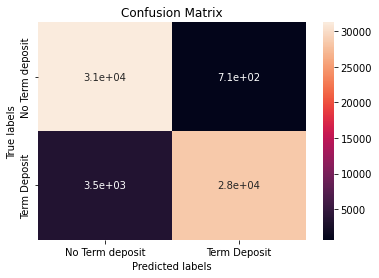

In [ ]:
# Get the confusion matrix for both train and test

labels = ['No Term deposit', 'Term Deposit']
cm = confusion_matrix(Y_train, train_class_preds_lr)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[7829  161]
 [ 871 7108]]


[Text(0, 0.5, 'No Term deposit'), Text(0, 1.5, 'Term Deposit')]

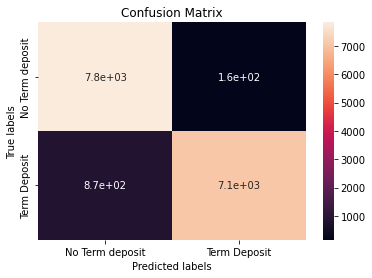

In [ ]:
# Get the confusion matrix for both train and test

labels = ['No Term deposit', 'Term Deposit']
cm = confusion_matrix(Y_test, test_class_preds_lr)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get the roc_auc score for train and test dataset
train_auc_lr = roc_auc_score(Y_train,train_preds_lr)
test_auc_lr = roc_auc_score(Y_test,test_preds_lr)

In [ ]:
train_auc_lr

0.9665862710898169

In [ ]:
test_auc_lr

0.9679999171793418

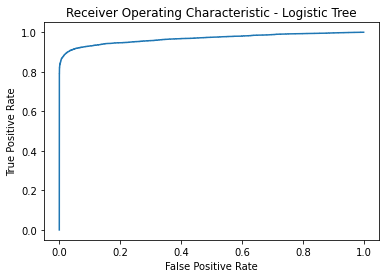

In [ ]:
false_positive_rate_lr, true_positive_rate_lr, threshold_lr = roc_curve(Y_test, test_preds_lr)
plt.plot(false_positive_rate_lr,true_positive_rate_lr)
plt.title('Receiver Operating Characteristic - Logistic Tree')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print(classification_report(Y_test, test_class_preds_lr, target_names=['class 0','class 1']))

              precision    recall  f1-score   support

     class 0       0.90      0.98      0.94      7990
     class 1       0.98      0.89      0.93      7979

    accuracy                           0.94     15969
   macro avg       0.94      0.94      0.94     15969
weighted avg       0.94      0.94      0.94     15969



#**KNN Classifier** 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_predict_train_knn = knn.predict(X_train)
y_predict_test_knn = knn.predict(X_test)

In [ ]:
train_preds_knn = knn.predict_proba(X_train)[:,1]
test_preds_knn = knn.predict_proba(X_test)[:,1]

In [ ]:
train_preds_knn

In [ ]:
test_preds_knn

In [ ]:
train_accuracy = knn.score(X_train, Y_train)
test_accuracy = knn.score(X_test, Y_test) 

In [ ]:
print("The score on train dataset is", train_accuracy)
print("The score on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8383561643835616
The accuracy on test dataset is 0.7949151480994426


In [ ]:
train_accuracy1 = accuracy_score(Y_train,y_predict_train_knn)
test_accuracy1 = accuracy_score(Y_test,y_predict_test_knn) 

In [ ]:
print("The score on train dataset is", train_accuracy1)
print("The score on test dataset is", test_accuracy1)

The score on train dataset is 0.8383561643835616
The score on test dataset is 0.7949151480994426


[[25761  6171]
 [ 1463 30480]]


[Text(0, 0.5, 'No Term deposit'), Text(0, 1.5, 'Term Deposit')]

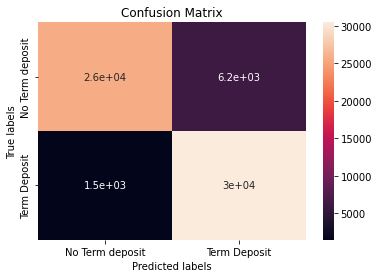

In [ ]:
# Get the confusion matrix for both train and test

labels = ['No Term deposit', 'Term Deposit']
cm = confusion_matrix(Y_train, y_predict_train_knn)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[5482 2508]
 [ 767 7212]]


[Text(0, 0.5, 'No Term deposit'), Text(0, 1.5, 'Term Deposit')]

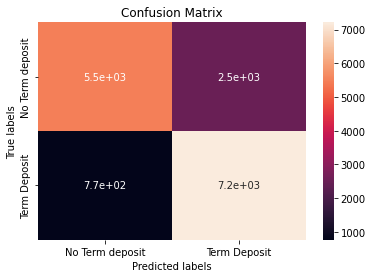

In [ ]:
# Get the confusion matrix for both train and test

labels = ['No Term deposit', 'Term Deposit']
cm = confusion_matrix(Y_test, y_predict_test_knn)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(classification_report(Y_test, y_predict_test_knn, target_names=['class 0','class 1']))

              precision    recall  f1-score   support

     class 0       0.88      0.69      0.77      7990
     class 1       0.74      0.90      0.81      7979

    accuracy                           0.79     15969
   macro avg       0.81      0.79      0.79     15969
weighted avg       0.81      0.79      0.79     15969



In [ ]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(Y_train,train_preds_knn)
test_auc = roc_auc_score(Y_test,test_preds_knn)

In [ ]:
train_auc

0.9397510348284206

In [ ]:
test_auc

0.8903345468337491

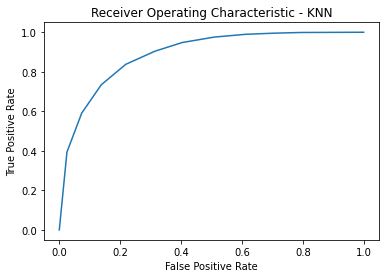

In [ ]:
false_positive_rate_dt, true_positive_rate_dt, threshold_dt = roc_curve(Y_test, test_preds_knn)
plt.plot(false_positive_rate_dt,true_positive_rate_dt)
plt.title('Receiver Operating Characteristic - KNN')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [ ]:
y_predict_train_dt = clf_dt.predict(X_train)
y_predict_test_dt = clf_dt.predict(X_test)

In [ ]:
train_preds_dt = clf_dt.predict_proba(X_train)[:,1]
test_preds_dt = clf_dt.predict_proba(X_test)[:,1]

In [ ]:
train_preds_dt

array([0.51397738, 0.51397738, 0.97444471, ..., 0.11247928, 0.51397738,
       0.51397738])

In [ ]:
len(train_preds_dt)

63875

In [ ]:
test_preds_dt

array([0.51397738, 0.97444471, 0.11247928, ..., 0.97444471, 0.97444471,
       0.51397738])

In [ ]:
len(test_preds_dt)

15969

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(Y_train,y_predict_train_dt)
test_accuracy = accuracy_score(Y_test,y_predict_test_dt)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.7597025440313111
The accuracy on test dataset is 0.7567161375164381


[[19299 12633]
 [ 2716 29227]]


[Text(0, 0.5, 'No Term deposit'), Text(0, 1.5, 'Term Deposit')]

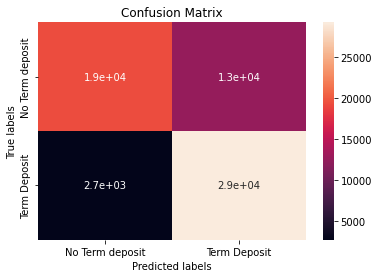

In [ ]:
# Get the confusion matrix for both train and test

labels = ['No Term deposit', 'Term Deposit']
cm = confusion_matrix(Y_train, y_predict_train_dt)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[4843 3147]
 [ 738 7241]]


[Text(0, 0.5, 'No Term deposit'), Text(0, 1.5, 'Term Deposit')]

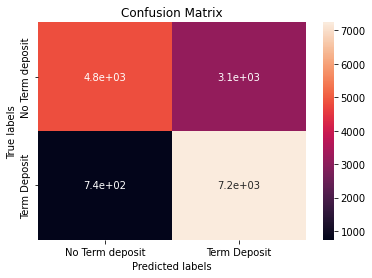

In [ ]:
# Get the confusion matrix for both train and test

labels = ['No Term deposit', 'Term Deposit']
cm = confusion_matrix(Y_test, y_predict_test_dt)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(classification_report(Y_test, y_predict_test_dt, target_names=['class 0','class 1']))

              precision    recall  f1-score   support

     class 0       0.87      0.61      0.71      7990
     class 1       0.70      0.91      0.79      7979

    accuracy                           0.76     15969
   macro avg       0.78      0.76      0.75     15969
weighted avg       0.78      0.76      0.75     15969



In [ ]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(Y_train,train_preds_dt)
test_auc = roc_auc_score(Y_test,test_preds_dt)

In [ ]:
train_auc

0.8637283266558882

In [ ]:
test_auc

0.8590461177737996

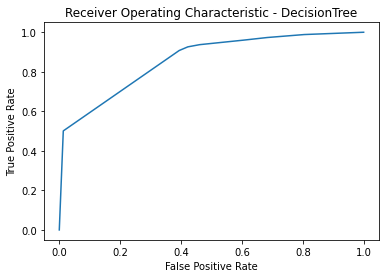

In [ ]:
false_positive_rate_dt, true_positive_rate_dt, threshold_dt = roc_curve(Y_test, test_preds_dt)
plt.plot(false_positive_rate_dt,true_positive_rate_dt)
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<BarContainer object of 45 artists>

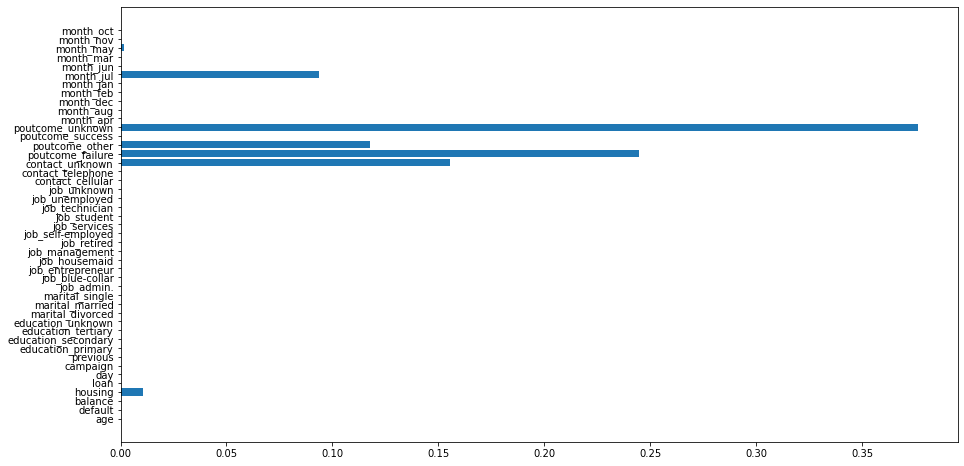

In [ ]:
plt.figure(figsize=(15,8))
plt.barh(X_train.columns, clf_dt.feature_importances_)

#**Naive Bayes**

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
y_pred_NB_test = gnb.predict(X_test)
y_pred_NB_train = gnb.predict(X_train)

In [ ]:
train_preds_NB = clf_dt.predict_proba(X_train)[:,1]
test_preds_NB = clf_dt.predict_proba(X_test)[:,1]

In [ ]:
train_preds_NB

array([0.51397738, 0.51397738, 0.97444471, ..., 0.11247928, 0.51397738,
       0.51397738])

In [ ]:
test_preds_NB

array([0.51397738, 0.97444471, 0.11247928, ..., 0.97444471, 0.97444471,
       0.51397738])

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(Y_train,y_pred_NB_train)
test_accuracy = accuracy_score(Y_test,y_pred_NB_test)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8835538160469667
The accuracy on test dataset is 0.8835243283862484


In [ ]:
train_accuracy1 = gnb.score(X_train,Y_train)
test_accuracy1 = gnb.score(X_test,Y_test)

print("The accuracy on train dataset is", train_accuracy1)
print("The accuracy on test dataset is", test_accuracy1)

The accuracy on train dataset is 0.8835538160469667
The accuracy on test dataset is 0.8835243283862484


[[28152  3780]
 [ 3658 28285]]


[Text(0, 0.5, 'No Term deposit'), Text(0, 1.5, 'Term Deposit')]

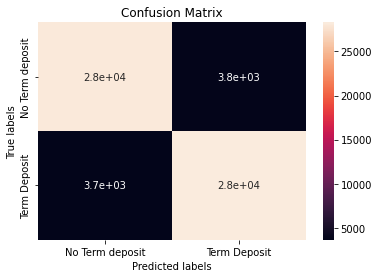

In [ ]:
# Get the confusion matrix for both train and test

labels = ['No Term deposit', 'Term Deposit']
cm = confusion_matrix(Y_train, y_pred_NB_train)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[7034  956]
 [ 904 7075]]


[Text(0, 0.5, 'No Term deposit'), Text(0, 1.5, 'Term Deposit')]

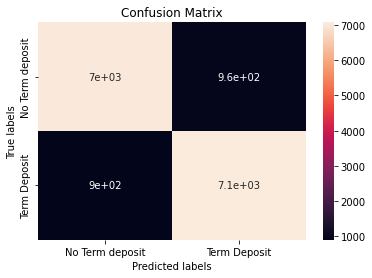

In [ ]:
# Get the confusion matrix for both train and test

labels = ['No Term deposit', 'Term Deposit']
cm = confusion_matrix(Y_test, y_pred_NB_test)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(Y_train,train_preds_NB)
test_auc = roc_auc_score(Y_test,test_preds_NB)

In [ ]:
train_auc

0.8637283266558882

In [ ]:
test_auc

0.8590461177737996

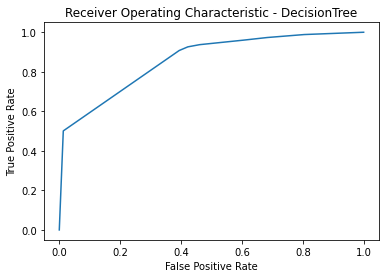

In [ ]:
false_positive_rate_dt, true_positive_rate_dt, threshold_dt = roc_curve(Y_test, test_preds_NB)
plt.plot(false_positive_rate_dt,true_positive_rate_dt)
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print(classification_report(Y_test, y_pred_NB_test, target_names=['class 0','class 1']))

              precision    recall  f1-score   support

     class 0       0.89      0.88      0.88      7990
     class 1       0.88      0.89      0.88      7979

    accuracy                           0.88     15969
   macro avg       0.88      0.88      0.88     15969
weighted avg       0.88      0.88      0.88     15969



#**Random forest Classifier**

In [ ]:
rf = RandomForestClassifier(n_estimators=100,random_state=20)

In [ ]:
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=20)

In [ ]:
y_pred_rf_test = rf.predict(X_test)
y_pred_rf_train = rf.predict(X_train)

In [ ]:
train_preds_RF = rf.predict_proba(X_train)[:,1]
test_preds_RF = rf.predict_proba(X_test)[:,1]

In [ ]:
train_preds_RF

array([0.05, 1.  , 1.  , ..., 0.97, 1.  , 1.  ])

In [ ]:
test_preds_RF

array([0.99, 1.  , 0.09, ..., 1.  , 0.99, 1.  ])

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(Y_train,y_pred_rf_train)
test_accuracy = accuracy_score(Y_test,y_pred_rf_test)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9999686888454011
The accuracy on test dataset is 0.9390068257248418


[[31932     0]
 [    2 31941]]


[Text(0, 0.5, 'No Term deposit'), Text(0, 1.5, 'Term Deposit')]

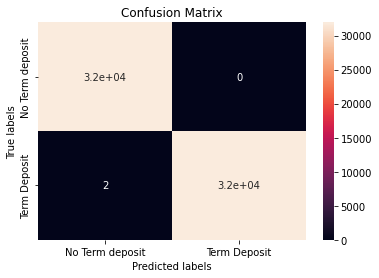

In [ ]:
# Get the confusion matrix for both train and test

labels = ['No Term deposit', 'Term Deposit']
cm = confusion_matrix(Y_train, y_pred_rf_train)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[7760  230]
 [ 744 7235]]


[Text(0, 0.5, 'No Term deposit'), Text(0, 1.5, 'Term Deposit')]

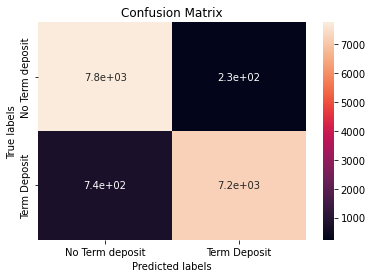

In [ ]:
# Get the confusion matrix for both train and test

labels = ['No Term deposit', 'Term Deposit']
cm = confusion_matrix(Y_test, y_pred_rf_test)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(Y_train,train_preds_RF)
test_auc = roc_auc_score(Y_test,test_preds_RF)

In [ ]:
train_auc

1.0

In [ ]:
test_auc

0.9724520687204412

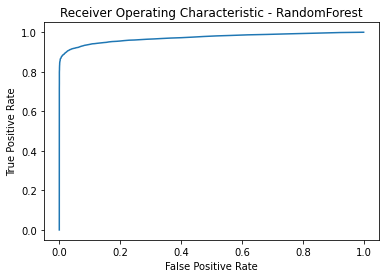

In [ ]:
false_positive_rate_dt, true_positive_rate_dt, threshold_dt = roc_curve(Y_test, test_preds_RF)
plt.plot(false_positive_rate_dt,true_positive_rate_dt)
plt.title('Receiver Operating Characteristic - RandomForest')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print(classification_report(Y_test, y_pred_rf_test, target_names=['class 0','class 1']))

              precision    recall  f1-score   support

     class 0       0.91      0.97      0.94      7990
     class 1       0.97      0.91      0.94      7979

    accuracy                           0.94     15969
   macro avg       0.94      0.94      0.94     15969
weighted avg       0.94      0.94      0.94     15969



In [ ]:
rf.feature_importances_

array([0.05630259, 0.00108444, 0.0661142 , 0.06635889, 0.02168646,
       0.0548101 , 0.03162384, 0.01823687, 0.01857879, 0.02762766,
       0.02050492, 0.00716161, 0.01636266, 0.02603714, 0.01937324,
       0.01069666, 0.02526182, 0.0044917 , 0.003776  , 0.01686258,
       0.00365818, 0.00471697, 0.00919487, 0.00309383, 0.01603002,
       0.00426977, 0.00100803, 0.01723857, 0.01176931, 0.07054253,
       0.0367379 , 0.01512999, 0.00481339, 0.08732981, 0.01084998,
       0.03990825, 0.00124454, 0.01565628, 0.01189594, 0.03475894,
       0.01437295, 0.00244206, 0.04173583, 0.0248879 , 0.00376199])

<BarContainer object of 45 artists>

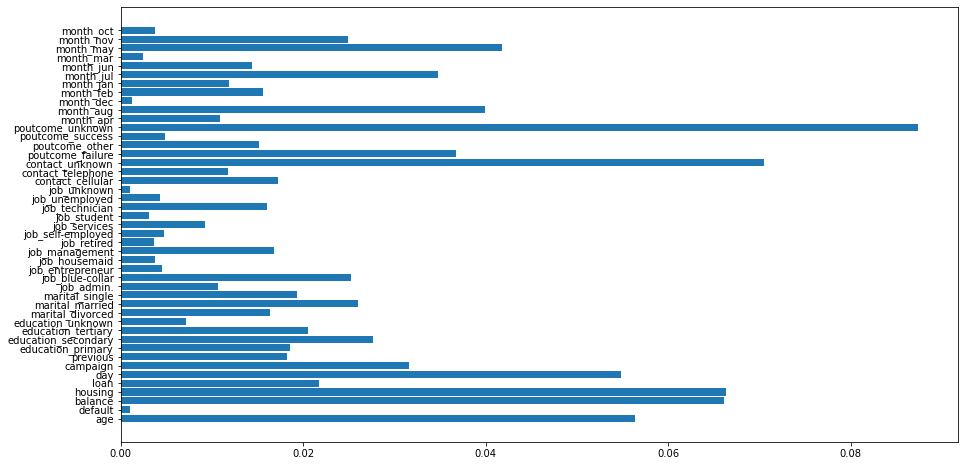

In [ ]:
plt.figure(figsize=(15,8))
plt.barh(X_train.columns, rf.feature_importances_)

#**Hperparameter tuning**

In [ ]:
rf = RandomForestClassifier() 
grid_values = {'n_estimators':[80, 100, 120], 'max_depth':[15, 25],'min_samples_leaf':[2,4],'min_samples_split': [5, 10], 'max_features':['sqrt','log2']}
rf_grid = GridSearchCV(rf, param_grid = grid_values, scoring = 'roc_auc', cv=3, verbose=2)

In [ ]:
rf_grid.fit(X_train,Y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=120; total time=   3.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=120; 

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [15, 25],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [80, 100, 120]},
             scoring='roc_auc', verbose=2)

In [ ]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=80)

In [ ]:
rf_grid.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 80}

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
# Making predictions on train and test data

y_pred_rf_tuned_train = rf_optimal_model.predict(X_train)
y_pred_rf_tuned_test = rf_optimal_model.predict(X_test)

In [ ]:
train_preds_RF_tuned = rf_optimal_model.predict_proba(X_train)[:,1]
test_preds_RF_tuned = rf_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
train_preds_RF_tuned

array([0.13705633, 0.99565877, 0.8944111 , ..., 0.79294431, 0.98603028,
       0.99777386])

In [ ]:
test_preds_RF_tuned

array([0.95152025, 0.98656538, 0.05067322, ..., 0.98828565, 0.97753658,
       0.99470881])

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(Y_train,y_pred_rf_tuned_train)
test_accuracy = accuracy_score(Y_test,y_pred_rf_tuned_test)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9600313111545988
The accuracy on test dataset is 0.9370029432024548


[[31582   350]
 [ 2203 29740]]


[Text(0, 0.5, 'No Term deposit'), Text(0, 1.5, 'Term Deposit')]

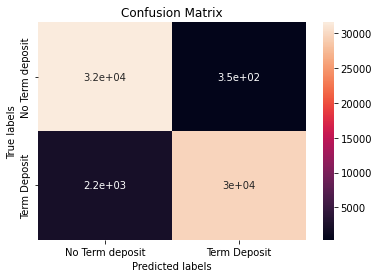

In [ ]:
# Get the confusion matrix for both train and test

labels = ['No Term deposit', 'Term Deposit']
cm = confusion_matrix(Y_train, y_pred_rf_tuned_train)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[7755  235]
 [ 771 7208]]


[Text(0, 0.5, 'No Term deposit'), Text(0, 1.5, 'Term Deposit')]

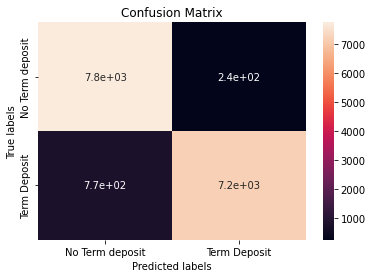

In [ ]:
# Get the confusion matrix for both train and test

labels = ['No Term deposit', 'Term Deposit']
cm = confusion_matrix(Y_test, y_pred_rf_tuned_test)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(Y_train,train_preds_RF_tuned)
test_auc = roc_auc_score(Y_test,test_preds_RF_tuned)

In [ ]:
train_auc

0.9963211639795768

In [ ]:
test_auc

0.9726187609809919

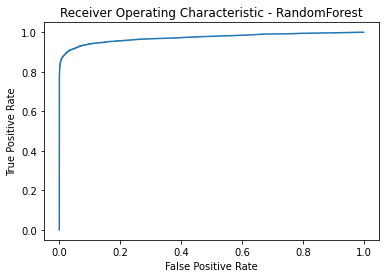

In [ ]:
false_positive_rate_dt, true_positive_rate_dt, threshold_dt = roc_curve(Y_test, test_preds_RF_tuned)
plt.plot(false_positive_rate_dt,true_positive_rate_dt)
plt.title('Receiver Operating Characteristic - RandomForest')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print(classification_report(Y_test, y_pred_rf_tuned_test, target_names=['class 0','class 1']))

              precision    recall  f1-score   support

     class 0       0.91      0.97      0.94      7990
     class 1       0.97      0.90      0.93      7979

    accuracy                           0.94     15969
   macro avg       0.94      0.94      0.94     15969
weighted avg       0.94      0.94      0.94     15969



<BarContainer object of 45 artists>

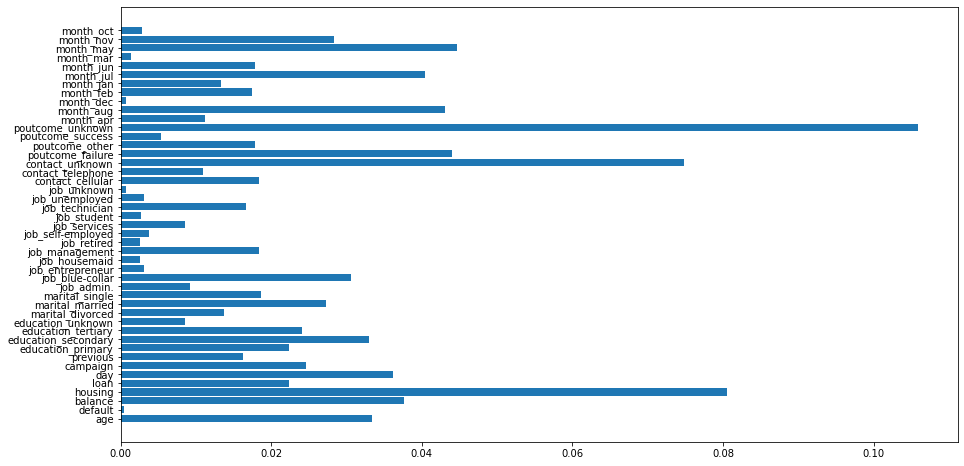

In [ ]:
plt.figure(figsize=(15,8))
plt.barh(X_train.columns, rf_optimal_model.feature_importances_)